In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#all data
NFL=pd.read_csv("NFL by Play 2009-2016.csv",low_memory=False)

In [17]:
#2016 only
NFL = NFL[NFL['Season']==2016]

In [18]:
##play attempted
NFL = NFL[NFL['PlayAttempted'] ==1]

In [19]:
##QB bata
qbs = NFL[NFL['PlayType'] == 'Pass']
qbs.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
316712,9/8/2016,2016090800,1,1,1.0,15:00,15,3600.0,0.0,DEN,...,1.061996,-0.690099,1.752096,0.500335,0.499665,0.534418,0.465582,0.500335,0.034083,2016
316713,9/8/2016,2016090800,1,1,1.0,14:17,15,3557.0,43.0,DEN,...,-0.673142,-0.672303,-0.000839,0.534418,0.465582,0.514323,0.485677,0.534418,-0.020095,2016
316714,9/8/2016,2016090800,1,1,2.0,14:13,15,3553.0,4.0,DEN,...,-0.977039,-0.425682,-0.551357,0.514323,0.485677,0.485313,0.514687,0.514323,-0.029011,2016
316715,9/8/2016,2016090800,1,1,3.0,14:08,15,3548.0,5.0,DEN,...,2.642901,2.486235,0.156666,0.485313,0.514687,0.566495,0.433505,0.485313,0.081182,2016
316716,9/8/2016,2016090800,1,1,1.0,13:42,14,3522.0,26.0,DEN,...,0.134246,-0.025009,0.159255,0.566495,0.433505,0.572501,0.427499,0.566495,0.006006,2016


In [20]:
qbs = qbs.groupby(['Date', 'posteam', 'Passer']).agg({'Yards.Gained' : 'sum', 'Touchdown' : 'sum', 'InterceptionThrown' : 'sum', 'Drive' : 'count' })

In [21]:
qbs['QB points'] = (qbs['Yards.Gained'] / 25) + (qbs['Touchdown'] * 4) - (qbs['InterceptionThrown'] * 2)

In [22]:
qbs.reset_index(inplace=True)

In [23]:
## WR data
wrs = NFL[NFL['PlayType'] == 'Pass']

In [24]:
wrs = wrs.groupby(['Date', 'posteam', 'Receiver']).agg({'Yards.Gained' : 'sum', 'Touchdown' : 'sum', 'Drive' : 'count' })

In [25]:
wrs['WR points'] = (wrs['Yards.Gained'] / 10) + (wrs['Touchdown'] * 6)

In [26]:
wrs.reset_index(inplace=True)

In [27]:
##Merge QB and WR datasets
games = pd.merge(qbs, wrs, how='left', left_on=['Date', 'posteam'], right_on=['Date', 'posteam'])

In [28]:
games = pd.merge(qbs, wrs, how='left', left_on=['Date', 'posteam'], right_on=['Date', 'posteam'])

In [29]:
len(games[(games['QB points'] >= 20) & (games['WR points'] >=20)])

43

In [30]:
bestplayers = games.groupby(['Date', 'posteam']).agg({'QB points' : 'max', 'WR points' : 'max'})

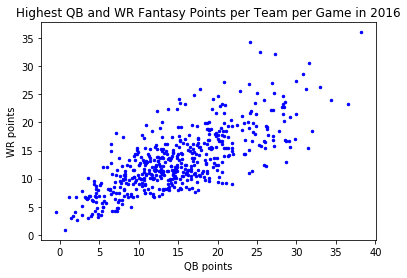

In [31]:
fig = plt.figure()
fig = bestplayers.plot.scatter(x='QB points', y='WR points', c='blue', s=6)
fig.set_title('Highest QB and WR Fantasy Points per Team per Game in 2016')
plt.savefig("fantasy points 1.png")

In [ ]:
#qb with more than 10 pass attempts 14.648625954198478
# wr with more than 5 pass attempts 8.679532634971801